# 3. Visual exploratory data analysis

Apakah Anda lebih mungkin ditangkap pada waktu tertentu? Apakah berhenti terkait narkoba meningkat? Dalam bab ini, Anda akan menjawab pertanyaan-pertanyaan ini dan lainnya dengan menganalisis dataset secara visual, karena plot dapat membantu Anda memahami tren dengan cara yang tidak bisa diperiksa oleh data mentah.

## Preparing Data

In [1]:
# Import the pandas library as pd
import pandas as pd

# Assign url file
file_police = 'https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv'

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv(file_police)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [3]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Does time of day affect arrest rate?

### Calculating the hourly arrest rate

Ketika seorang polisi menghentikan sopir, sebagian kecil dari pemberhentian itu berakhir dengan penangkapan. Ini dikenal sebagai tingkat penangkapan. Dalam latihan ini, Anda akan mengetahui apakah tingkat penangkapan bervariasi berdasarkan waktu hari.

Pertama, Anda akan menghitung tingkat penangkapan di semua perhentian. Kemudian, Anda akan menghitung tingkat penangkapan per jam dengan menggunakan atribut `hour` indeks. `hour` berkisar dari 0 hingga 23, di mana:

* 0 = midnight
* 12 = noon
* 23 = 11 PM

In [2]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


**Note** : Selanjutnya Anda akan memplot data sehingga Anda dapat secara visual memeriksa tren tingkat penangkapan.

### Plotting the hourly arrest rate 

Dalam latihan ini, Anda akan membuat plot garis dari objek `hourly_arrest_rate`. Plot garis sesuai dalam kasus ini karena Anda menunjukkan bagaimana kuantitas berubah seiring waktu. 

Plot ini akan membantu Anda menemukan beberapa tren yang mungkin tidak jelas ketika memeriksa bilangan mentah!

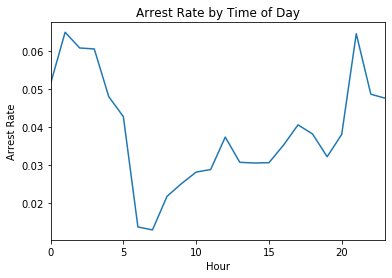

In [4]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

**Note** : Tingkat penangkapan memiliki lonjakan yang signifikan dalam semalam, dan kemudian turun pada jam-jam awal pagi.

## Are drug-related stops on the rise?

### Plotting drug-related stops

Dalam sebagian kecil perhentian lalu lintas, obat-obatan ditemukan di dalam kendaraan selama pencarian. Dalam latihan ini, Anda akan menilai apakah berhenti terkait obat ini menjadi lebih umum dari waktu ke waktu.

Kolom Boolean `drugs_related_stop` menunjukkan apakah obat ditemukan selama pemberhentian yang diberikan. Anda akan menghitung laju obat tahunan dengan melakukan resampling kolom ini, dan kemudian Anda akan menggunakan plot garis untuk memvisualisasikan bagaimana angka tersebut berubah dari waktu ke waktu.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


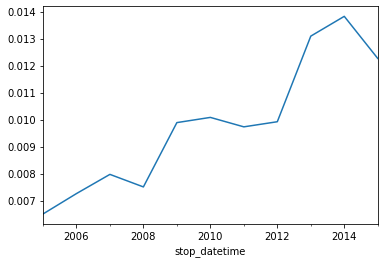

In [5]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

**Note** : Menarik! Tingkat pemberhentian terkait narkoba hampir dua kali lipat selama 10 tahun. Mengapa demikian?

### Comparing drug and search rates

Seperti yang Anda lihat dalam latihan terakhir, tingkat pemberhentian terkait obat meningkat secara signifikan antara 2005 dan 2015. Anda mungkin berhipotesis bahwa tingkat pencarian kendaraan juga meningkat, yang akan menyebabkan peningkatan pemberhentian terkait obat bahkan jika lebih banyak pengemudi tidak membawa narkoba.

Anda dapat menguji hipotesis ini dengan menghitung tingkat pencarian tahunan, dan kemudian melakukan plot terhadap tingkat obat tahunan. Jika hipotesis ini benar, maka Anda akan melihat kedua tingkat kenaikan dari waktu ke waktu.

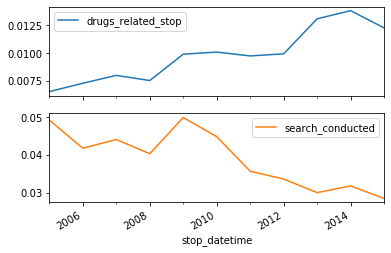

In [6]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

**Note** : Tingkat pemberhentian terkait obat meningkat meskipun tingkat pencarian menurun, menyangkal hipotesis kami.

## What violations are caught in each district?

### Tallying violations by district

Negara bagian Rhode Island dipecah menjadi enam distrik kepolisian, juga dikenal sebagai zona. Bagaimana zona membandingkan dalam hal pelanggaran apa yang ditangkap oleh polisi?

Dalam latihan ini, Anda akan membuat tabel frekuensi untuk menentukan berapa banyak pelanggaran dari setiap jenis terjadi di masing-masing dari enam zona. Kemudian, Anda akan memfilter tabel untuk fokus pada zona "K", yang akan Anda periksa lebih lanjut pada latihan berikutnya.

In [8]:
# Create a frequency table of districts and violations
pd.crosstab(ri.district, ri.violation)

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [12]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


**Note** : Selanjutnya Anda akan memplotting pelanggaran sehingga Anda dapat membandingkan distrik-distrik ini.

### Plotting violations by district

Sekarang setelah Anda membuat tabel frekuensi yang berfokus pada zona "K", Anda akan memvisualisasikan data untuk membantu Anda membandingkan pelanggaran apa yang ditangkap di setiap zona.

Pertama, Anda akan membuat plot bar, yang merupakan tipe plot yang sesuai karena Anda membandingkan data kategorikal. Kemudian Anda akan membuat plot bar bertumpuk (*stacked*) untuk mendapatkan tampilan data yang sedikit berbeda. Plot mana yang menurut Anda lebih mendalam?

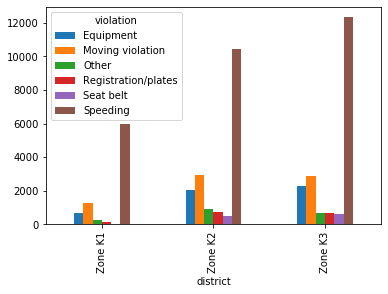

In [13]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

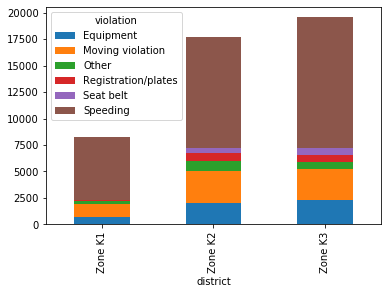

In [14]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

**Note** : Sebagian besar perhentian lalu lintas di Zona K1 adalah karena kecepatan, dan Zona K2 dan K3 sangat mirip satu sama lain dalam hal pelanggaran.

## How long might you be stopped for a violation?

### Converting stop durations to numbers

Pada datset perhentian lalu lintas, kolom `stop_duration` memberi tahu Anda kira-kira berapa lama pengemudi ditahan oleh petugas. Sayangnya, durasinya disimpan sebagai string, seperti `'0-15 Min'`. Bagaimana Anda bisa membuat data ini lebih mudah untuk dianalisis?

Dalam latihan ini, Anda akan mengonversi durasi pemberhentian menjadi bilangan bulat. Karena durasi yang tepat tidak tersedia, Anda harus memperkirakan angka menggunakan nilai yang layak:

* Konversi `'0-15 Min'` ke `8`
* Konversi `'16-30 Min'` ke `23`
* Konversi `'30+ Min'` ke `45`

In [15]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = { '0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45 }

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


**Note** : Selanjutnya Anda akan menganalisis berapa lama waktu pemberhentian untuk setiap jenis pelanggaran.

### Plotting stop length

Jika Anda dihentikan karena pelanggaran tertentu, berapa lama Anda berharap akan ditahan?

Dalam latihan ini, Anda akan memvisualisasikan rata-rata lama waktu driver dihentikan untuk setiap jenis pelanggaran. Daripada menggunakan kolom `violation` dalam latihan ini, Anda akan menggunakan `violation_raw` karena mengandung deskripsi pelanggaran yang lebih rinci.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


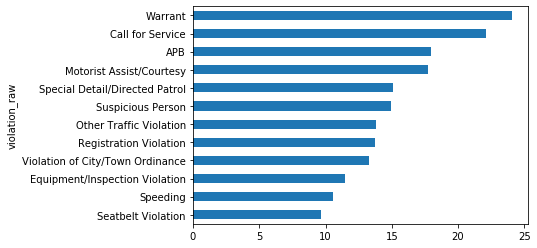

In [16]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

**Note** : Anda telah menyelesaikan bab tentang analisis data eksplorasi visual!